In [1]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys




In [55]:
csv_dir = '/home/ccchen/Documents/dr_chang/AI_tau_20211201_details.csv'
pre_df = pd.read_csv(csv_dir)
df = pre_df[['Frontal','Temporal','Occipital','Parietal','Thalamus','Caudate','Putamen','Pallidum','S_nigra','Midbrain','Cerebellum_Crus','GM','Background']]
#print(pre_df.shape, df.shape)
df.describe()
#null_value_stats = df.isnull().sum(axis=0)
#print(null_value_stats)

,Frontal,Temporal,Occipital,Parietal,Thalamus,Caudate,Putamen,Pallidum,S_nigra,Midbrain,Cerebellum_Crus,GM,Background
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.001218,1.133157,1.141270,1.026812,1.323791,0.830565,1.160347,1.277064,1.215276,1.183735,0.975432,1.060598,0.389142
std,0.229507,0.275254,0.239579,0.222101,0.361725,0.167780,0.212238,0.305204,0.292597,0.302753,0.233633,0.226911,0.314944
min,0.697042,0.740481,0.739111,0.745673,0.553958,0.389441,0.706236,0.577786,0.507054,0.529149,0.400252,0.772350,0.000000
25%,0.862711,0.963852,0.993407,0.882398,1.052485,0.714597,1.030432,1.090913,1.066163,1.025597,0.850582,0.922001,0.132919
50%,0.942738,1.065552,1.084137,0.977482,1.267525,0.833962,1.129312,1.239615,1.229411,1.157745,0.962204,1.008604,0.305396
75%,1.057933,1.224168,1.202600,1.095352,1.541056,0.935269,1.253756,1.408086,1.360058,1.306806,1.079004,1.127873,0.582249
max,2.639362,2.952233,2.420399,2.440121,2.385130,1.345925,2.637564,2.872776,2.959314,2.673736,2.440079,2.631861,1.329917


In [59]:
from sklearn.mixture import GaussianMixture
df_normal = df.to_numpy()
label_anatomy =['Frontal','Temporal','Occipital','Parietal','Thalamus','Caudate','Putamen','Pallidum','S_nigra','Midbrain','Cerebellum_Crus','GM','Background']
new_df = df.copy()
bdd = np.quantile(df_normal,0.25,axis =0)
print(bdd)
o_std = []
o_mean =[]
print(df.isnull().sum(axis=0))
for i in range(df_normal.shape[1]):
    assert df.keys()[i]==label_anatomy[i]
    
    df_slice = df_normal[:,i]
    slice_cand = df_slice[df_slice < bdd[i]]
    #print(slice_cand)
    s_std = np.std(slice_cand)
    s_mean = np.mean(slice_cand)
    o_mean.append(s_mean)
    o_std.append(s_std)
    '''
    gm = GaussianMixture(n_components=2, random_state=0).fit(X)
    index = np.argmin(gm.means_)
    s_mean = gm.means_[index].squeeze()
    s_std = np.sqrt(gm.covariances_[index].squeeze())
    s_weight =gm.weights_[index].squeeze()
    print(index, s_mean,s_std,s_weight)
    '''
    anatomy = df.keys()[i]
    new_df[anatomy]= ((df[anatomy].copy()-s_mean)/s_std) #.apply(lambda x: (x - s_mean)/s_std)
    #print(anatomy, 'mean = '   , gm.means_  ,'std = ' , gm.covariances_, 'num =',gm.weights_) 
print('mean ',o_mean,' std ' ,o_std)
new_df.describe()

[0.86271125 0.96385175 0.99340725 0.8823985  1.0524845  0.71459725
 1.03043225 1.09091325 1.066163   1.025597   0.850582   0.922001
 0.13291925]
Frontal            0
Temporal           0
Occipital          0
Parietal           0
Thalamus           0
Caudate            0
Putamen            0
Pallidum           0
S_nigra            0
Midbrain           0
Cerebellum_Crus    0
GM                 0
Background         0
dtype: int64
mean  [0.818398536231884, 0.8937663333333331, 0.9364726231884059, 0.8361384927536232, 0.9264959420289856, 0.6166153768115942, 0.946907768115942, 0.9350608550724637, 0.8684010869565219, 0.8449514492753621, 0.7147955797101451, 0.8698818695652174, 0.06263097101449276]  std  [0.037141631996711215, 0.04552417613757366, 0.04232634059207084, 0.0346915391659007, 0.11936764509806462, 0.07439023522372154, 0.07070602661994953, 0.12344916531861627, 0.14798856719274145, 0.1339694211913091, 0.10980180601962422, 0.033855882036379556, 0.04386532210814521]


,Frontal,Temporal,Occipital,Parietal,Thalamus,Caudate,Putamen,Pallidum,S_nigra,Midbrain,Cerebellum_Crus,GM,Background
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,4.922223,5.258542,4.838526,5.496260,3.328334,2.876038,3.018683,2.770397,2.343929,2.528816,2.373703,5.633181,7.443499
std,6.179232,6.046327,5.660280,6.402162,3.030345,2.255407,3.001691,2.472308,1.977160,2.259863,2.127767,6.702271,7.179794
min,-3.267399,-3.367119,-4.662856,-2.607711,-3.120929,-3.053820,-3.403837,-2.894105,-2.441723,-2.357273,-2.864649,-2.880795,-1.427801
25%,1.193074,1.539521,1.345135,1.333467,1.055467,1.317134,1.181292,1.262482,1.336332,1.348409,1.236650,1.539441,1.602366
50%,3.347725,3.773493,3.488723,4.074293,2.856964,2.921716,2.579755,2.467037,2.439448,2.334817,2.253227,4.097431,5.534327
75%,6.449218,7.257713,6.287518,7.471945,5.148468,4.283538,4.339782,3.831740,3.322261,3.447461,3.316960,7.620268,11.845753
max,49.027557,45.217000,35.059170,46.235553,12.219677,9.803835,23.911063,15.696462,14.128881,13.650761,15.712705,52.043516,28.890385


In [47]:
import pySuStaIn
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [6]:
df_normal = new_df.to_numpy()
small =np.mean( np.quantile(df_normal,0.50,axis =0))
med =np.mean(np.quantile(df_normal,0.65,axis =0)) #np.mean(df_normal,axis =0)
big =np.mean( np.quantile(df_normal,0.80,axis =0))

print(small) #np.mean(df_normal,axis =0))
print(med)#np.quantile(df_normal,0.50,axis =0))
print(big) #np.quantile(df_normal,0.75,axis =0))

print(np.mean(np.quantile(df_normal,0.90,axis =0)))

#np.stack([small,med,big],axis = 1)
#print(z_stack.shape)
#print(z_stack)
z_max = np.mean(np.quantile(df_normal,0.90,axis =0))

0.29799138445097406
0.8250775664049491
1.6244064294955838
2.6115441107546564


In [61]:
df_normal = new_df.to_numpy()
df_normal = np.where(df_normal <0,0,df_normal)
z_max =10
df_normal = np.where(df_normal > z_max,z_max,df_normal)
print(np.quantile(df_normal,0.80,axis =0))
N                       = df_normal.shape[1]         # number of biomarkers
M                       = df_normal.shape[0]         # number of observations ( e.g. subjects )
#N_S_gt                  = 4                          # number of ground truth subtypes
SuStaInLabels  = ['Frontal','Temporal','Occipital','Parietal','Thalamus','Caudate','Putamen','Pallidum','S_nigra','Midbrain','Cerebellum_Crus','GM','Background']
print(N,M,len(SuStaInLabels))
#for i in range(N):
#        SuStaInLabels.append( 'Biomarker '+str(i)) 
Z_vals                  = np.array([[2,5,7]]*N) #np.array([[small,med,big]]*N)     # Z-scores for each biomarker
Z_max                   = np.array([z_max]*N) #np.array([z_max]*N)    

N_startpoints           = 25                        #The number of startpoints to use when fitting the subtypes hierarchichally. Using 25 from the author's suggestion.
N_S_max                 = 3                         #The maximum number of subtypes to fit
N_iterations_MCMC       = int(1e5)                  #The number of iterations for the MCMC sampling of the uncertainty in the progression pattern. using 1e5 or 1e6 by the author's suggestion.
output_folder = os.path.join(os.getcwd(), 'sim_128_renormal_25710_quantile25_relu')
dataset_name = 'sim_128_renormal_25710_quantile25_relu'
sustain_input = pySuStaIn.ZscoreSustain(df_normal,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)


[ 7.49483662  8.37090748  8.14283427  8.61202802  5.94879842  4.65080695
  4.68964596  4.33522692  3.59288507  3.77330548  3.52689481  8.21027584
 10.        ]
13 276 13


In [62]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()


Failed to find pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim_128_renormal_25710_quantile25_relu/pickle_files/sim_128_renormal_25710_quantile25_relu_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -11239.208939964185


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

Failed to find pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim_128_renormal_25710_quantile25_relu/pickle_files/sim_128_renormal_25710_quantile25_relu_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8848.9118178]
Overall ML likelihood is [-8848.9118178]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

Failed to find pickle file: /home/ccchen/projects/pySuStaIn/notebooks/sim_128_renormal_25710_quantile25_relu/pickle_files/sim_128_renormal_25710_quantile25_relu_subtype2.pickle. Running SuStaIn model for 2 subtype.
Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8238.89118872]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8298.6308283]
Overall ML likelihood is [-8238.89118872]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/100000 [00:00<?, ?it/s]

In [63]:
df['subtype']=pd.Series(ml_subtype[:,0])

df['stage'] = pd.Series(ml_stage[:,0])

df=df.sort_values(['subtype', 'stage'])

save_dir = '/home/ccchen/Documents/dr_chang/ai_tau_3_cluster_initial_128_25710_quantile25_relu.csv'
df.to_csv(save_dir)

/home/ccchen/miniconda3/envs/ssl/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ccchen/miniconda3/envs/ssl/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


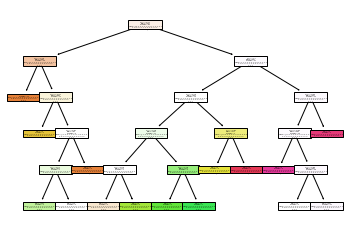

In [14]:
cluster_df =df[df['subtype']==2]
c_train = cluster_df.drop(['subtype','stage'], axis = 1)
l_train = cluster_df['stage']
c_train.describe()

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth =5)
clf = clf.fit(c_train, l_train)
import matplotlib.pyplot as plt

plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree_quantile_5_initial_3.eps',format='eps',bbox_inches = "tight")

[2 5 7]
[2 5 7]
[2 5 7]


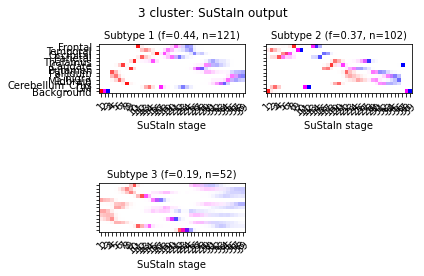

In [64]:
# The code below opens the results for the ground truth number of subtypes
# and plots the output
s = N_S_max-1

pickle_filename_s           = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pickle_filepath             = Path(pickle_filename_s)
pickle_file                 = open(pickle_filename_s, 'rb')
loaded_variables            = pickle.load(pickle_file)
samples_sequence            = loaded_variables["samples_sequence"]
samples_f                   = loaded_variables["samples_f"]


pickle_file.close()

pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M)
_ = plt.suptitle('3 cluster: SuStaIn output')
